Importing libraries and packages for the model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data=pd.read_csv("/content/weatherAUS.csv")
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
print(data.shape)
print(data.info())

(10811, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64

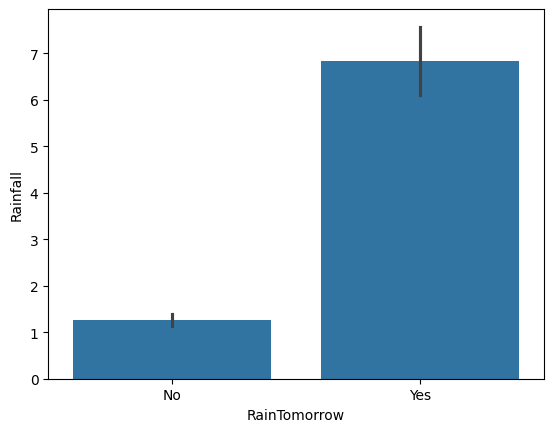

In [ ]:
sns.barplot(y="Rainfall",x="RainTomorrow",data=data)
plt.show()

Splitting the columns

In [ ]:
X=data.iloc[:,[1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21]].values
y=data.iloc[:,[-1]].values

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['CoffsHarbour' 18.3 27.1 ... 24.8 25.9 'No']
 ['CoffsHarbour' 17.8 28.1 ... 24.6 26.7 'No']
 ['CoffsHarbour' 19.2 28.0 ... nan nan nan]]


In [ ]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


It will replace the NULL values with most frequent values in the data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['CoffsHarbour' 18.3 27.1 ... 24.8 25.9 'No']
 ['CoffsHarbour' 17.8 28.1 ... 24.6 26.7 'No']
 ['CoffsHarbour' 19.2 28.0 ... 20.6 18.4 'No']]


In [ ]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [ ]:
RainTomorrow=pd.get_dummies(data["RainTomorrow"],drop_first=True)
RainToday=pd.get_dummies(data["RainToday"],drop_first=True)
print(RainTomorrow)
print(RainToday)

       Yes
0        0
1        0
2        0
3        0
4        0
...    ...
10806    0
10807    0
10808    0
10809    0
10810    0

[10811 rows x 1 columns]
       Yes
0        0
1        0
2        0
3        0
4        0
...    ...
10806    0
10807    0
10808    0
10809    0
10810    0

[10811 rows x 1 columns]


This will convert the strings to float values for better evaluation

In [ ]:
le1=LabelEncoder()
X[:,0]=le1.fit_transform(X[:,0])
le2=LabelEncoder()
X[:,4]=le2.fit_transform(X[:,4])
le3=LabelEncoder()
X[:,6]=le3.fit_transform(X[:,6])
le4=LabelEncoder()
X[:,7]=le4.fit_transform(X[:,7])
le5=LabelEncoder()
X[:,-1]=le5.fit_transform(X[:,-1])
le6=LabelEncoder()
y[:,-1]=le6.fit_transform(y[:,-1])

In [ ]:
print(X)

[[0 13.4 22.9 ... 16.9 21.8 0]
 [0 7.4 25.1 ... 17.2 24.3 0]
 [0 12.9 25.7 ... 21.0 23.2 0]
 ...
 [3 18.3 27.1 ... 24.8 25.9 0]
 [3 17.8 28.1 ... 24.6 26.7 0]
 [3 19.2 28.0 ... 20.6 18.4 0]]


In [ ]:
y= np.array(y,dtype=float)
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


We are splitting the test and train data sets and given the test size

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8648, 19)
(2163, 19)
(8648, 1)
(2163, 1)


We will use random forest for this model and use the corresponding function to make the model learn

In [26]:
from sklearn.linear_model import LinearRegression
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


<ipython-input-26-28ef7f54bbd1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


This is the accuracy score of the model

In [27]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8700878409616274
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1710
         1.0       0.82      0.49      0.61       453

    accuracy                           0.87      2163
   macro avg       0.85      0.73      0.77      2163
weighted avg       0.87      0.87      0.86      2163



In [32]:
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_pred)
print(y_test)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [34]:
df = np.concatenate((y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['will it Rain Tommorrow','Predition of Rain'])
print(dataframe)

      will it Rain Tommorrow  Predition of Rain
0                        0.0                0.0
1                        0.0                0.0
2                        0.0                0.0
3                        0.0                0.0
4                        1.0                1.0
...                      ...                ...
2158                     0.0                0.0
2159                     0.0                0.0
2160                     0.0                0.0
2161                     0.0                0.0
2162                     0.0                0.0

[2163 rows x 2 columns]
